In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder , StandardScaler

## 1- EDA Explore Data

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.duplicated().sum()

0

## 2- Transform Object Data

In [8]:
la = LabelEncoder()

In [9]:
data['Gender'] = la.fit_transform(data['Gender'])

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## 3- Create Module

In [11]:
#ss = StandardScaler()

In [12]:
#data_scaled = ss.fit_transform(data[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

In [13]:
#model = KMeans(n_clusters=5)

In [14]:
#model.fit(data)

In [15]:
#model.inertia_ # error margin

In [16]:
cluster_n = []
j = []

In [17]:
for i in range(1, 12):
    model = KMeans(n_clusters=i)
    model.fit(data)
    cluster_n.append(i)
    model.inertia_
    j.append(model.inertia_)
print(cluster_n)
print(j)



c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[975512.06, 387065.7137713771, 271384.5087828679, 195401.1985599147, 157620.97147979142, 122637.5579611015, 103233.01724386725, 86032.7477703868, 77002.3582686457, 69021.970086027, 64320.32040584639]


In [18]:
pd.DataFrame(cluster_n, j)

,0
975512.060000,1
387065.713771,2
271384.508783,3
195401.198560,4
157620.971480,5
122637.557961,6
103233.017244,7
86032.747770,8
77002.358269,9
69021.970086,10


Text(0, 0.5, 'Perc of Error')

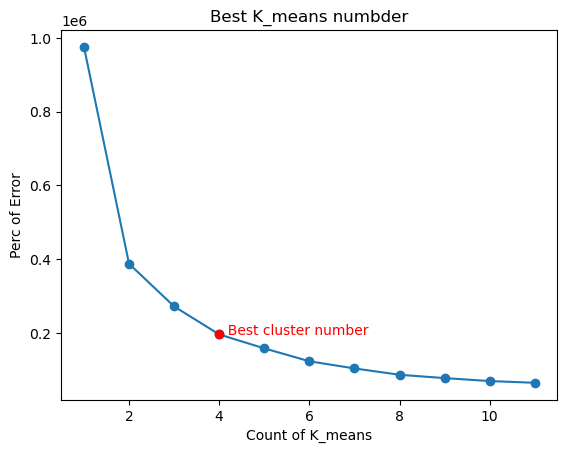

In [19]:
plt.plot(cluster_n, j, marker = 'o')
plt.title('Best K_means numbder')
plt.xlabel('Count of K_means')
plt.plot(cluster_n[3], j[3], marker='o', color = 'r') 
plt.text(cluster_n[3], j[3], '  Best cluster number', color='r')
plt.ylabel('Perc of Error')

In [20]:
model = KMeans(n_clusters=4)
model.fit(data)
pred = model.predict(data)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
data['k_mean'] = pred
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


In [22]:
data['k_mean'].value_counts()

k_mean
3    66
1    59
2    39
0    36
Name: count, dtype: int64

In [23]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

In [24]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
128,129,1,59,71,11,0
130,131,1,47,71,9,0
132,133,0,25,72,34,0
134,135,1,20,73,5,0
136,137,0,44,73,7,0


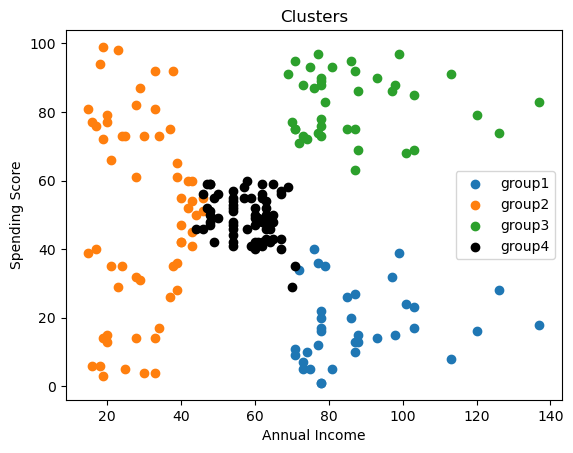

In [25]:
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], label='group1')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], label='group2')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], label='group3')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], label='group4', color= 'black')

plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()

<Axes: xlabel='k_mean', ylabel='count'>

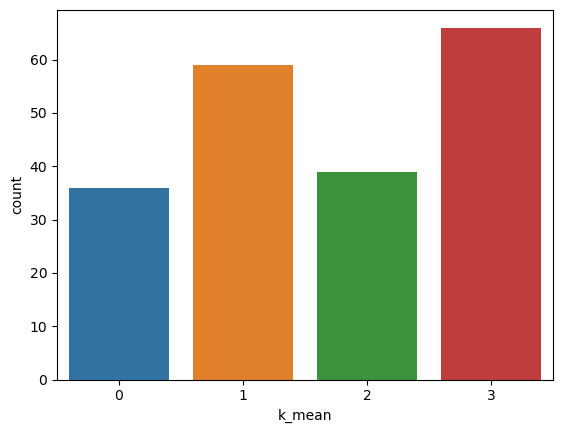

In [26]:
#sns.countplot(data['k_mean'])
sns.countplot(data=data, x='k_mean')

<Axes: ylabel='count'>

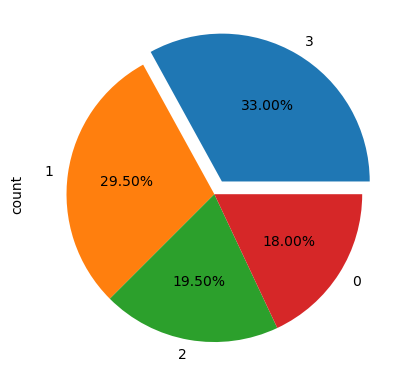

In [27]:
explode = (0.1, 0, 0, 0) # to separate part of pie chart
data['k_mean'].value_counts().plot.pie(autopct='%0.2f%%', explode=explode )

<Axes: xlabel='k_mean', ylabel='Spending Score (1-100)'>

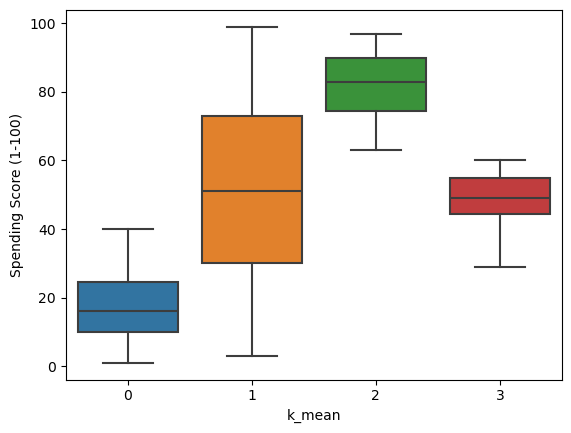

In [28]:
sns.boxplot(x = data['k_mean'], y = data['Spending Score (1-100)'])

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

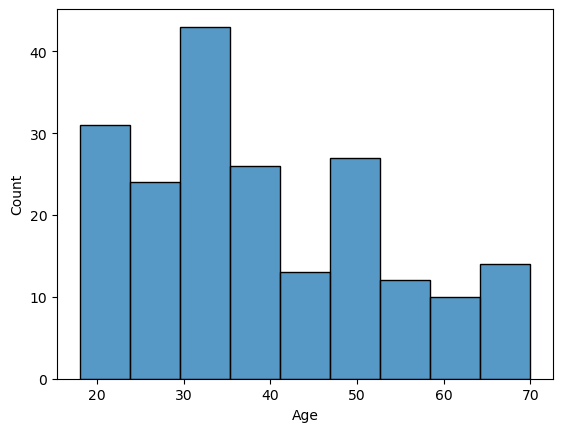

In [29]:
sns.histplot(data['Age'])

<Axes: xlabel='k_mean', ylabel='count'>

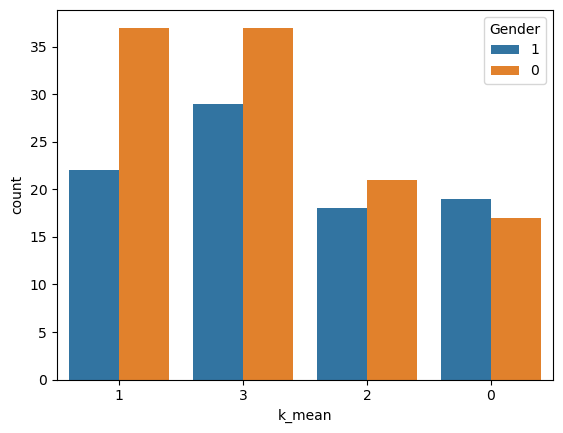

In [30]:
data['k_mean'] = data['k_mean'].astype(str)
data['Gender'] = data['Gender'].astype(str)
sns.countplot(data=data, x='k_mean', hue='Gender')


<Axes: xlabel='Gender', ylabel='count'>

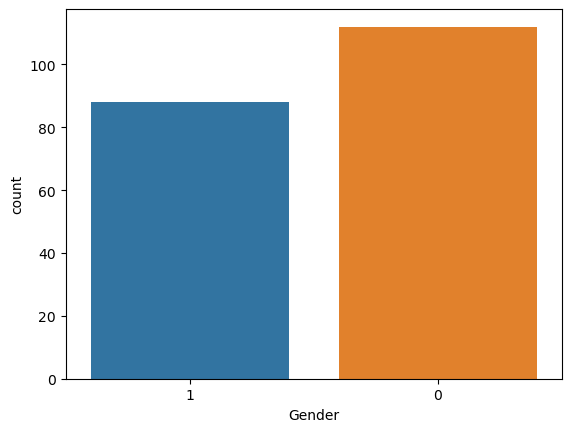

In [31]:
sns.countplot(data=data, x='Gender')